# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
credito = r'\Users\Meu Computador\anaconda3\@ EBAC\Árvore de decisão I\demo01_df.csv'
credito_df = pd.read_csv(credito)
credito_df.head(2)

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,mau_True
0,0,0,58.832877,3.106849,1,0,0,0,2.0,1,...,1,0,0,0,1,0,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,0,...,0,0,1,0,1,0,0,0,0,0


In [5]:
y = credito_df['mau_True']
x = credito_df.drop('mau_True', axis=1)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3,
                                                    random_state = 100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

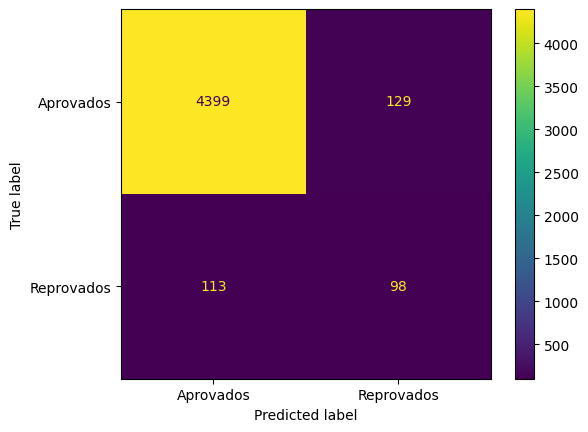

In [8]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_test, y_test)
predict = clf.predict(x_train)
ConfusionMatrixDisplay.from_estimator(clf, 
                                      x_train, y_train, 
                                      display_labels=['Aprovados', 'Reprovados']);

In [9]:
train_acc = round(accuracy_score(y_train, predict)*100)

print(f'The accuracy of train its {train_acc}%.')

The accuracy of train its 95%.


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

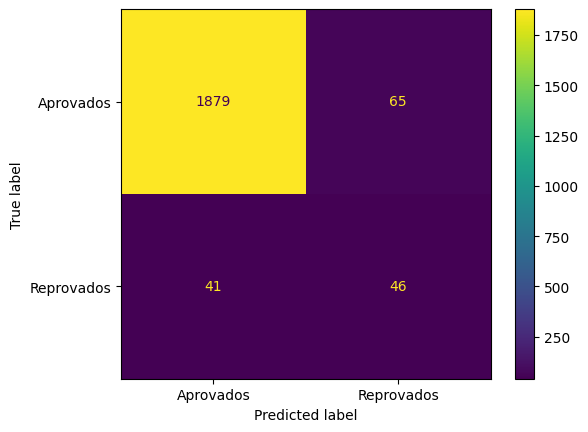

In [11]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)
ConfusionMatrixDisplay.from_estimator(clf, 
                                      x_test, y_test, 
                                      display_labels=['Aprovados', 'Reprovados']);

In [12]:
test_acc = round(accuracy_score(y_test, predict)*100)

print(f'The accuracy of the test its {test_acc}%.')

The accuracy of the test its 95%.


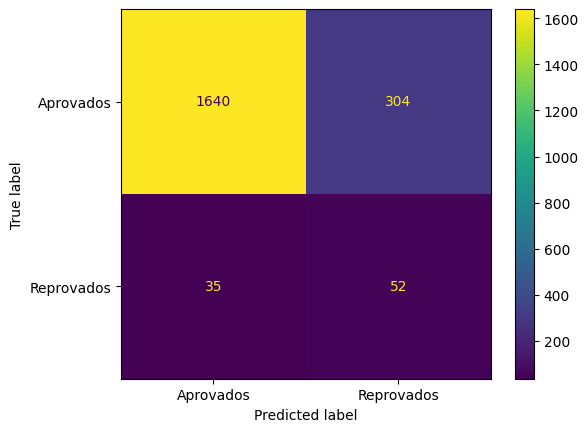

In [58]:
clf = DecisionTreeClassifier(max_depth=10,
                             min_samples_leaf=5,
                             random_state=123,
                             class_weight='balanced')
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)
ConfusionMatrixDisplay.from_estimator(clf, 
                                      x_test, y_test, 
                                      display_labels=['Aprovados', 'Reprovados']);

In [78]:
proportion_bad = sum(predict == 1) / len(predict)
print(f'The proportion of bad its {proportion_bad:.2%}.')

The proportion of bad its 17.53%.


In [80]:
all_good = [0] * len(y_test)
accuracy_good = accuracy_score(y_test, all_good)
print(f'Accuracy if all will be classificaded like Good its {accuracy_good:.2%}.')

Accuracy if all will be classificaded like Good its 95.72%.
